#Lab 3: Convolutional Neural Networks
## Two classes classification
Images were loaded from the weather dataset


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [4]:
import cv2
import os
import numpy as np

# Load images from directories (images are resized to 64x64 patches)
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels

# Path to the folder with the dataset
samples, labels = load_img('/content/gdrive/MyDrive/weather/weather_binary/')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels



Loading: sunrise
Loading: cloudy
loaded 657  samples
classes {'sunrise', 'cloudy'}


Present example images from the dataset

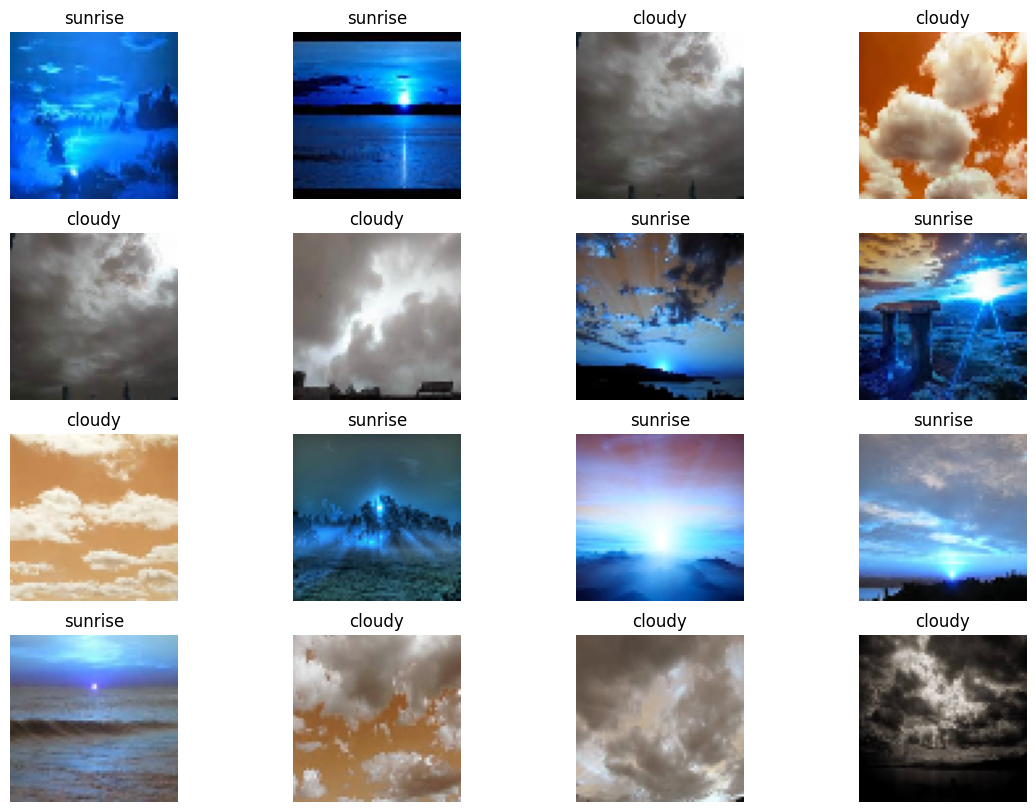

In [5]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 10))
for i in range(16):
    n = random.randrange(len(samples))
    plt.subplot(4, 4, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")

Images belong to four different classes: cloudy, rain, shine and sunrise. In the first step we performed binary classification. We used only cloudy and sunrise classes.

# Firts model - one output

In [ ]:
# Create CNN

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()
optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [36]:

samples = org_samples.copy()
labels = org_labels.copy()
print("Samples shape",samples.shape)
print(labels.shape)

Samples shape (657, 64, 64, 3)
(657,)


In [39]:
# Encode the labels

labels[labels[:]=='cloudy']=0
labels[labels[:]=='sunrise']=1
labels = labels.astype(float)
print(labels)
print(labels.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

Train model for 20 epochs

In [ ]:

import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=22)
hist = model.fit(trainSamples, trainLabels, epochs=20, validation_data=(testSamples,testLabels))

Show results

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)
testResults = (testResults).astype(dtype=int)
print(testResults)
print(confusion_matrix(testLabels, testResults))
print(classification_report(testLabels, testResults))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels, testResults)))
print("Accuracy: ",accuracy_score(testLabels, testResults))


# Second Model - two output neurons

In [119]:
# Path to the folder with the dataset
samples, labels = load_img('/content/gdrive/MyDrive/weather/weather_binary/')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels
print(labels.shape)

Loading: sunrise
Loading: cloudy
loaded 657  samples
classes {'sunrise', 'cloudy'}
(657,)


In [120]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("softmax"))

model.summary()
optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_44 (Ba  (None, 64, 64, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_88 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_45 (Ba  (None, 32, 32, 32)      

In [121]:

samples = org_samples.copy()
labels = org_labels.copy()
print("Samples shape",samples.shape)
print(labels.shape)

Samples shape (657, 64, 64, 3)
(657,)


In [124]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = labels.astype(float)
labels =tf.keras.utils.to_categorical(labels)
print(labels)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=22)
hist = model.fit(trainSamples, trainLabels, epochs=80, validation_data=(testSamples,testLabels))

Epoch 1/80
16/16 [==============================] - 4s 180ms/step - loss: 0.7411 - accuracy: 0.8435 - val_loss: 4.1941 - val_accuracy: 0.5697
Epoch 2/80
16/16 [==============================] - 3s 163ms/step - loss: 0.0521 - accuracy: 0.9797 - val_loss: 3.9865 - val_accuracy: 0.5636
Epoch 3/80
16/16 [==============================] - 3s 163ms/step - loss: 0.1438 - accuracy: 0.9390 - val_loss: 2.7855 - val_accuracy: 0.5939
Epoch 4/80
16/16 [==============================] - 3s 211ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 1.1044 - val_accuracy: 0.7394
Epoch 5/80
16/16 [==============================] - 4s 261ms/step - loss: 0.0183 - accuracy: 0.9939 - val_loss: 0.2441 - val_accuracy: 0.9212
Epoch 6/80
16/16 [==============================] - 3s 171ms/step - loss: 0.1201 - accuracy: 0.9634 - val_loss: 0.2591 - val_accuracy: 0.9152
Epoch 7/80
16/16 [==============================] - 3s 170ms/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.2571 - val_accuracy: 0.9091
Epoch 

# Third model - four output neurons


We created a CNN to perform 4 classes classification.

Loading: rain
Loading: sunrise
Loading: cloudy
Loading: shine
loaded 1123  samples
classes {'shine', 'sunrise', 'cloudy', 'rain'}
(1123,)
Labels shape (1123, 4)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_26 (Ba  (None, 64, 64, 16)        64        
 tchNormalization)                                               
                                                                 
 activation_52 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)     

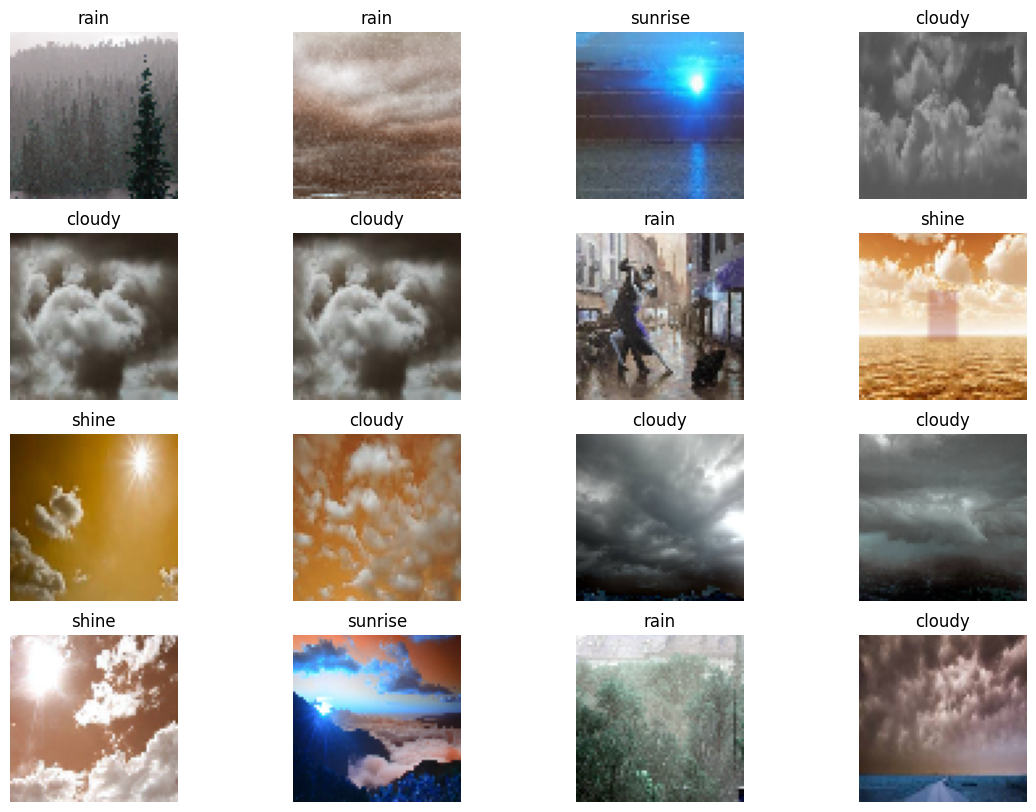

In [63]:
# Path to the folder with the dataset
samples, labels = load_img('/content/gdrive/MyDrive/weather/weather/')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels
print(labels.shape)

import matplotlib.pyplot as plt
import random

plt.figure(figsize=(14, 10))
for i in range(16):
    n = random.randrange(len(samples))
    plt.subplot(4, 4, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")


# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("Labels shape",labels.shape)
labels = labels.astype(float)

from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(4))
model.add(Activation("softmax"))

model.summary()
optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [53]:
import sklearn.model_selection

print("Samples shape before",samples.shape)
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=22)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
hist = model.fit(trainSamples, trainLabels, epochs=80, validation_data=(testSamples,testLabels))

Samples shape before (1123, 64, 64, 3)
Epoch 1/80
27/27 [==============================] - 6s 187ms/step - loss: 2.8412 - accuracy: 0.6817 - val_loss: 5.1806 - val_accuracy: 0.4982
Epoch 2/80
27/27 [==============================] - 5s 184ms/step - loss: 0.4869 - accuracy: 0.8171 - val_loss: 1.9067 - val_accuracy: 0.5231
Epoch 3/80
27/27 [==============================] - 6s 239ms/step - loss: 0.3062 - accuracy: 0.8824 - val_loss: 1.4856 - val_accuracy: 0.6192
Epoch 4/80
27/27 [==============================] - 5s 179ms/step - loss: 0.2556 - accuracy: 0.8979 - val_loss: 1.5688 - val_accuracy: 0.6335
Epoch 5/80
27/27 [==============================] - 6s 206ms/step - loss: 0.1827 - accuracy: 0.9323 - val_loss: 0.9026 - val_accuracy: 0.7260
Epoch 6/80
27/27 [==============================] - 6s 215ms/step - loss: 0.1331 - accuracy: 0.9584 - val_loss: 0.6476 - val_accuracy: 0.8221
Epoch 7/80
27/27 [==============================] - 5s 177ms/step - loss: 0.0969 - accuracy: 0.9679 - val_los